In [235]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [236]:
def freq_to_lambda(freq_Ghz): #Ghz
    c=299792458 # Speed of Light (m/s)
    lambda_m=c/(freq_Ghz*10**9)
    return lambda_m

In [237]:
file_1000 ='/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Wipl_Results/LepidopteraNoctuidaeMoth_12_Full_M_1000_1_94_BBG.ra1'
file_9375 ='/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Wipl_Results/LepidopteraNoctuidaeMoth_12_Full_M_9375_1_94_BBG.ra1'
file_0500 ='/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Wipl_Results/LepidopteraNoctuidaeMoth_12_Full_M_0500_1_94_BBG.ra1'
file_0250 ='/Users/rrniii/Google_Drive/code/PycharmProjects/biodar/data/Wipl_Results/LepidopteraNoctuidaeMoth_12_Full_M_0250_1_94_BBG.ra1'

In [238]:
def wipl_radiation_output_reader(path_to_file):
    ra1_df=pd.read_csv(path_to_file, sep=' ', skiprows=1, skipinitialspace=True,
                      names=['phi','theta','E_phi_real','E_phi_imag','E_theta_real','E_theta_imag', 'RCS','RCS_dB'])
    ra1_dict={'BugType' : path_to_file.split('/')[-1].split('_')[0], 
              'Specimen_Number' : path_to_file.split('/')[-1].split('_')[1],
              'BodyType' : path_to_file.split('/')[-1].split('_')[2],
              'WingPositioning' : path_to_file.split('/')[-1].split('_')[3],
              'Resolution' : int(path_to_file.split('/')[-1].split('_')[4])/10,
              'Scale' : int(path_to_file.split('/')[-1].split('_')[5])/10,
              'Frequency' : int(path_to_file.split('/')[-1].split('_')[6])/10,
              'InternalDomain' : path_to_file.split('/')[-1].split('_')[7].split('.')[0]
              },
    return ra1_df, ra1_dict

In [239]:
ra1_df_1000, ra1_dict_1000 = wipl_radiation_output_reader(file_1000)
ra1_df_9375, ra1_dict_9375 = wipl_radiation_output_reader(file_9375)

ra1_df_0500, ra1_dict_0500 = wipl_radiation_output_reader(file_0500)
ra1_df_0250, ra1_dict_0250 = wipl_radiation_output_reader(file_0250)

In [217]:
max(pd.to_numeric(ra1_df['RCS']))/min(pd.to_numeric(ra1_df['RCS']))

1.3017981905748368

In [218]:
s_yy_250=min(pd.to_numeric(ra1_df_0250['RCS']))*(freq_to_lambda(9.4)*100)**2
s_xx_250=max(pd.to_numeric(ra1_df_0250['RCS']))*(freq_to_lambda(9.4)*100)**2

s_yy_500=min(pd.to_numeric(ra1_df_0500['RCS']))*(freq_to_lambda(9.4)*100)**2
s_xx_500=max(pd.to_numeric(ra1_df_0500['RCS']))*(freq_to_lambda(9.4)*100)**2

s_yy_9375=min(pd.to_numeric(ra1_df_9375['RCS']))*(freq_to_lambda(9.4)*100)**2
s_xx_9375=max(pd.to_numeric(ra1_df_9375['RCS']))*(freq_to_lambda(9.4)*100)**2

s_yy_1000=min(pd.to_numeric(ra1_df_1000['RCS']))*(freq_to_lambda(9.4)*100)**2
s_xx_1000=max(pd.to_numeric(ra1_df_1000['RCS']))*(freq_to_lambda(9.4)*100)**2

print(s_yy_250,s_xx_250)
print(s_yy_500,s_xx_500)
print(s_yy_9375,s_xx_9375)
print(s_yy_1000,s_xx_1000)


0.6482951873302226 0.8439495018248587
0.6555641132993912 0.8435686023713658
0.742437103559653 0.9733765121418887
0.6458327319975811 0.8262065266680972


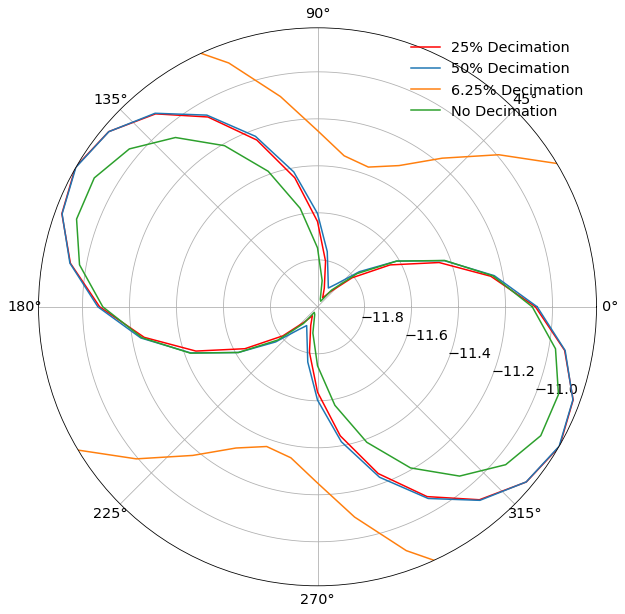

In [229]:
fig, axs = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=[10,15])
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

axs.plot(np.deg2rad(pd.to_numeric(ra1_df_0250['phi'])),pd.to_numeric(ra1_df_0250['RCS_dB']), 'r', label='25% Decimation')
axs.plot(np.deg2rad(pd.to_numeric(ra1_df_0500['phi'])),pd.to_numeric(ra1_df_0500['RCS_dB']), label='50% Decimation')
axs.plot(np.deg2rad(pd.to_numeric(ra1_df_9375['phi'])),pd.to_numeric(ra1_df_9375['RCS_dB']), label='6.25% Decimation')
axs.plot(np.deg2rad(pd.to_numeric(ra1_df_1000['phi'])),pd.to_numeric(ra1_df_1000['RCS_dB']), label='No Decimation')


axs.set_rmin(np.floor(min(pd.to_numeric(ra1_df_0500['RCS_dB']))))
axs.set_rmax((max(pd.to_numeric(ra1_df_0500['RCS_dB']))))
axs.set_rlabel_position(-22.5) 

plt.legend(loc='upper right', frameon=False)

In [234]:
.4694*(freq_to_lambda(9.4)*100)**2-.4678*(freq_to_lambda(9.4)*100)**2

0.016274426052273583

In [233]:
.4678*(freq_to_lambda(9.4)*100)**2

4.758235317033535